In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Functions for plotting

In [195]:
def single_emotion_line_plot(df, title):
    fig, axs = plt.subplots(2, 4, figsize=(10, 5))
    fig.suptitle(title)

    fig.supxlabel('Time in s for conversation start')
    fig.supylabel('Emotion intensity')
    
    # Plot line plots on each subplot
    axs[0, 0].plot(df.start/60, df['joy'])
    axs[0, 0].set_title('Joy')
    axs[0, 0].set_ylim(0,1)

    axs[0, 1].plot(df.start/60, df['fear'])
    axs[0, 1].set_title('fear')
    axs[0, 1].set_ylim(0,1)

    axs[0, 2].plot(df.start/60, df['anger'])
    axs[0, 2].set_title('Anger')
    axs[0, 2].set_ylim(0,1)

    axs[0, 3].plot(df.start/60, df['disgust'])
    axs[0, 3].set_title('Disgust')
    axs[0, 3].set_ylim(0,1)

    axs[1, 0].plot(df.start/60, df['surprise'])
    axs[1, 0].set_title('Surprise')
    axs[1, 0].set_ylim(0,1)

    axs[1, 1].plot(df.start/60, df['sadness'])
    axs[1, 1].set_title('Sadness')
    axs[1, 1].set_ylim(0,1)

    
    axs[1, 2].plot(df.start/60, df['neutral'])
    axs[1, 2].set_title('Neutral')
    axs[1, 2].set_ylim(0,1)

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

In [189]:
def all_emotions_line_plot(df, title):
    plt.figure(figsize=(15, 4))
    plt.plot(df.start/60, df['joy'], label = "joy")
    plt.plot(df.start/60, df['fear'], label = "fear")
    plt.plot(df.start/60, df['neutral'], label = "neutral")
    plt.plot(df.start/60, df['disgust'], label = "disgust")
    plt.plot(df.start/60, df['anger'], label = "anger")
    plt.plot(df.start/60, df['surprise'], label = "surprise")
    plt.plot(df.start/60, df['sadness'], label = "sadness")
    plt.legend()
    plt.title(title)
    plt.show()

In [229]:
def pie_plot_total_emotions(df_morning, df_afternoon, title, neutral=True):
    labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']
    
    if not neutral: 
        labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']
    
    sizes_afternoon = [df_afternoon.sum()[label] for label in labels]
    sizes_morning = [df_morning.sum()[label] for label in labels]

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    fig.suptitle(title)
    axs[0].pie(sizes_morning, labels=labels, autopct='%1.1f%%')
    axs[0].set_title('Morning')

    axs[1].pie(sizes_afternoon, labels=labels, autopct='%1.1f%%')
    axs[1].set_title('Afternoon')

In [230]:
def calculate_highest_emotion(df, neutral=True):
    df_new = df.copy()
    if neutral:
        max_values = df_new[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']].max(axis=1)
        df_new[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']] = df_new[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'neutral']].eq(max_values, axis=0).astype(int)
        return df_new
    else:
        df_new = df_new.drop('neutral', axis=1)
        max_values = df_new[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']].max(axis=1)
        df_new[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']] = df_new[['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']].eq(max_values, axis=0).astype(int)
        return df_new

# Cuban Vocals

In [182]:
df_vocals_afternoon = pd.read_csv('../data/emotion_from_transcript/emotion-english-distilroberta-base/jazzaar-20230417-afternoon-JFLB-Cuban-Vocals-video Philipp.csv', index_col=0)
df_vocals_morning = pd.read_csv('../data/emotion_from_transcript/emotion-english-distilroberta-base/jazzaar-20230417-morning-JFLB-Cuban-Vocals-video Philipp.csv', index_col=0)

df_vocals_afternoon_abs = calculate_highest_emotion(df_vocals_afternoon,False)
df_vocals_morning_abs = calculate_highest_emotion(df_vocals_morning,False)

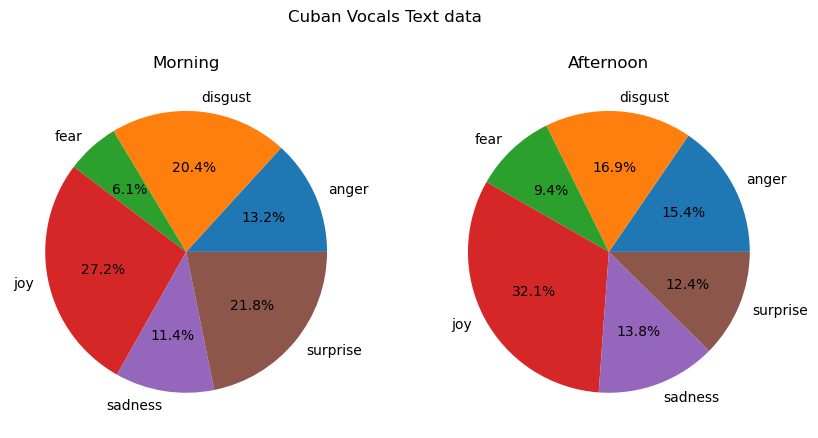

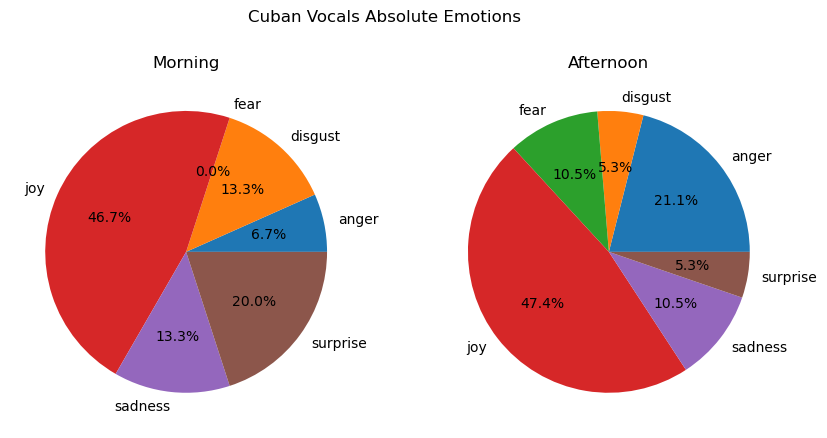

In [232]:
pie_plot_total_emotions(df_vocals_morning, df_vocals_afternoon, "Cuban Vocals Text data", False)
pie_plot_total_emotions(df_vocals_morning_abs, df_vocals_afternoon_abs, "Cuban Vocals Absolute Emotions", False)

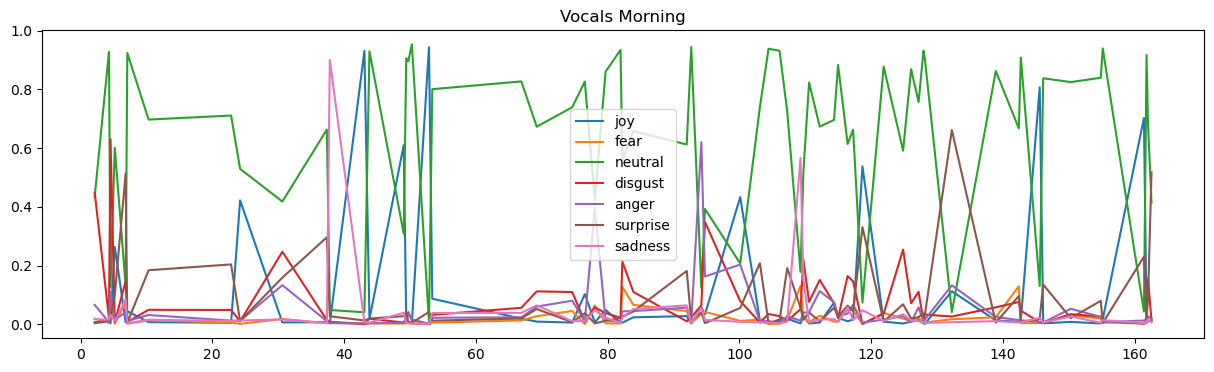

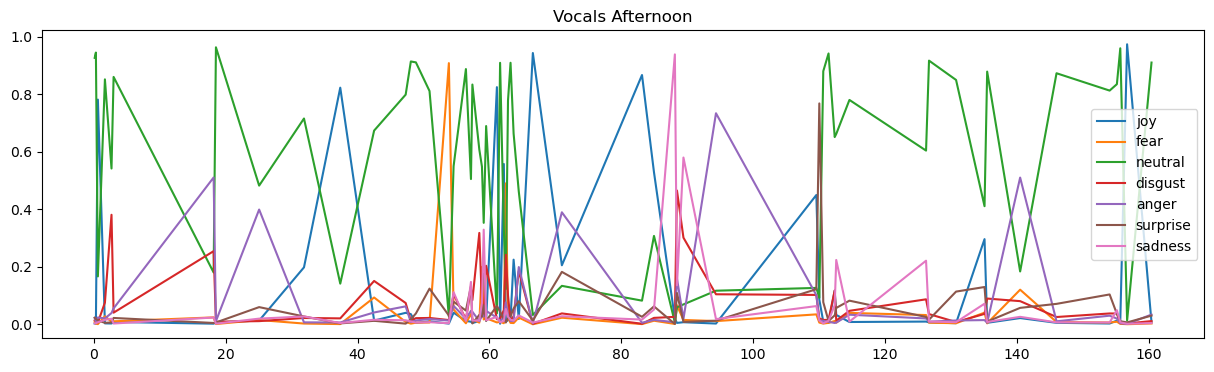

In [184]:
all_emotions_line_plot(df_vocals_morning, "Vocals Morning")
all_emotions_line_plot(df_vocals_afternoon, "Vocals Afternoon")

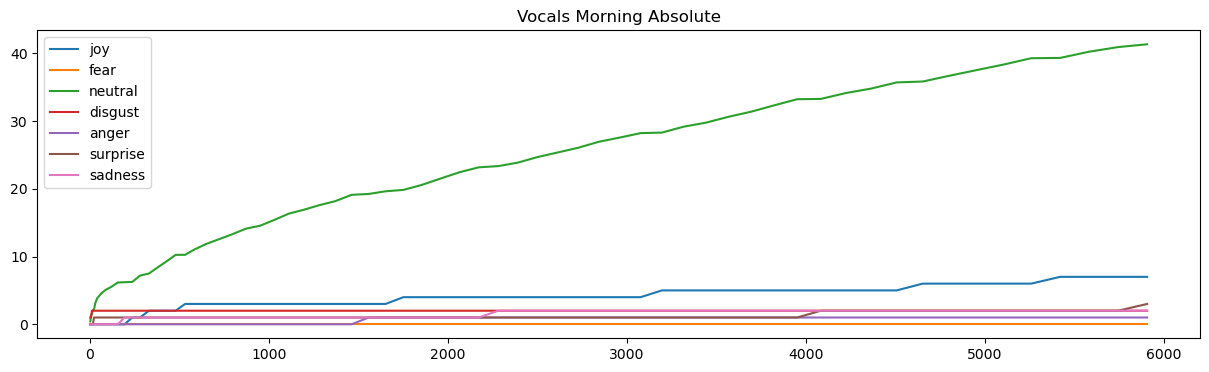

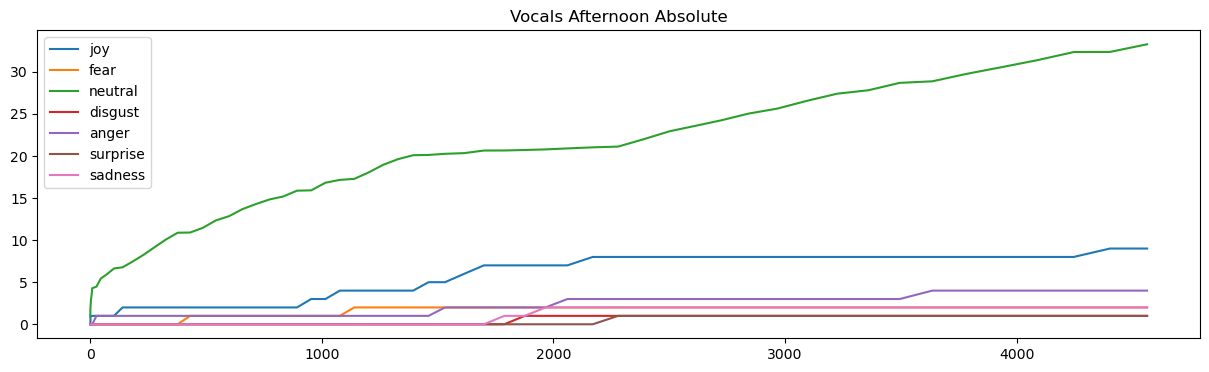

In [192]:
all_emotions_line_plot(df_vocals_morning_abs.cumsum(), "Vocals Morning Absolute")
all_emotions_line_plot(df_vocals_afternoon_abs.cumsum(), "Vocals Afternoon Absolute")

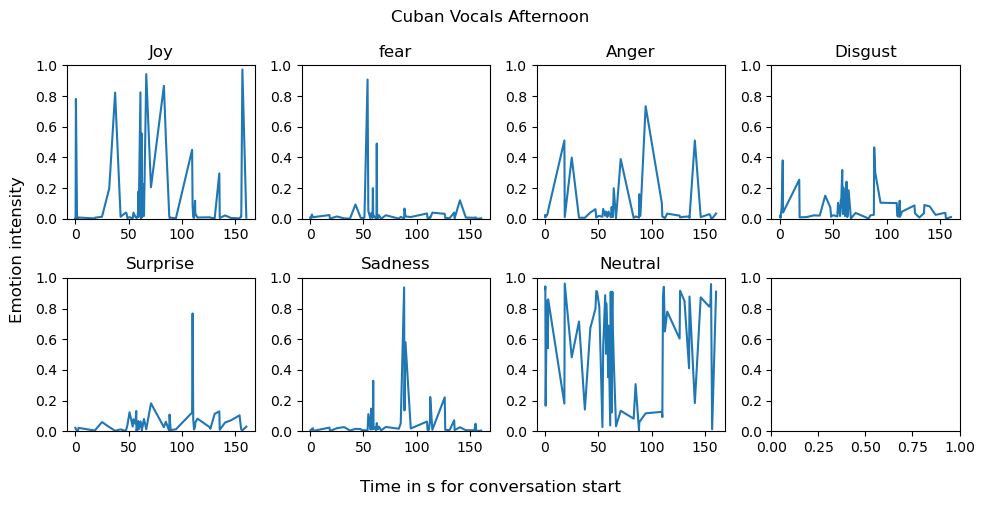

In [196]:
single_emotion_line_plot(df_vocals_afternoon, "Cuban Vocals Afternoon")


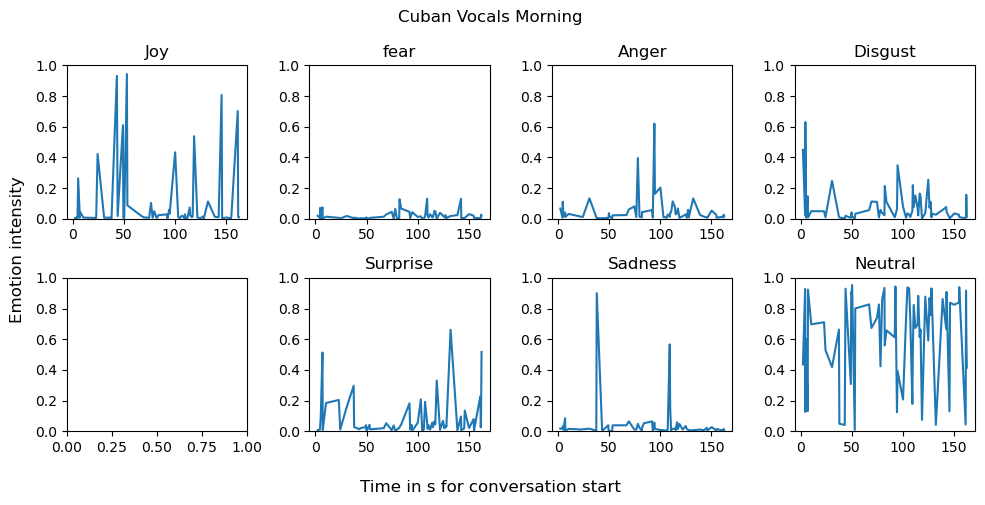

In [194]:
single_emotion_line_plot(df_vocals_morning, "Cuban Vocals Morning")


# Funk Rhythm

In [210]:
df_rhythm_afternoon = pd.read_csv('../data/emotion_from_transcript/emotion-english-distilroberta-base/JFBB_Rhythm_Section_Day1_Afternoon Thomas.csv', index_col=0)
df_rhythm_morning = pd.read_csv('../data/emotion_from_transcript/emotion-english-distilroberta-base/JFBB_Rhythm_Section_Day1_Morning Thomas.csv', index_col=0)

df_rhythm_afternoon_abs = calculate_highest_emotion(df_rhythm_afternoon)
df_rhythm_morning_abs = calculate_highest_emotion(df_rhythm_morning)

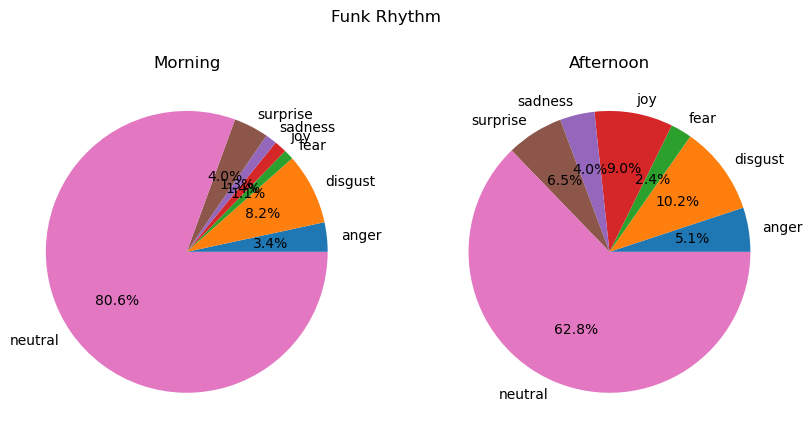

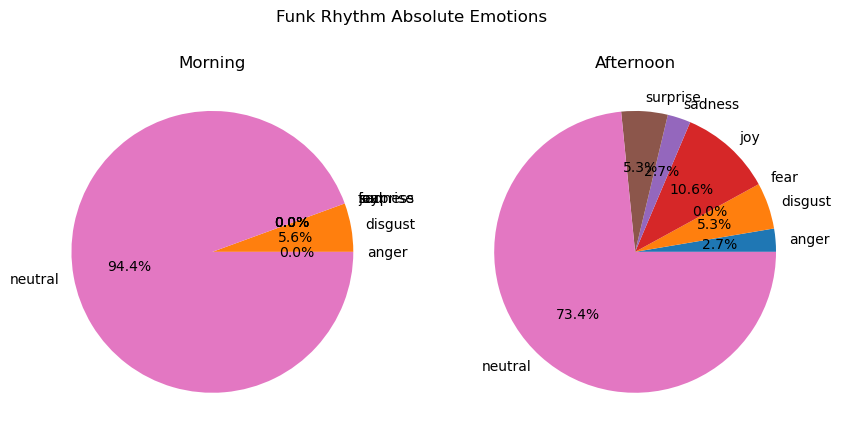

In [211]:
pie_plot_total_emotions(df_rhythm_morning, df_rhythm_afternoon, "Funk Rhythm")
pie_plot_total_emotions(df_rhythm_morning_abs, df_rhythm_afternoon_abs, "Funk Rhythm Absolute Emotions")

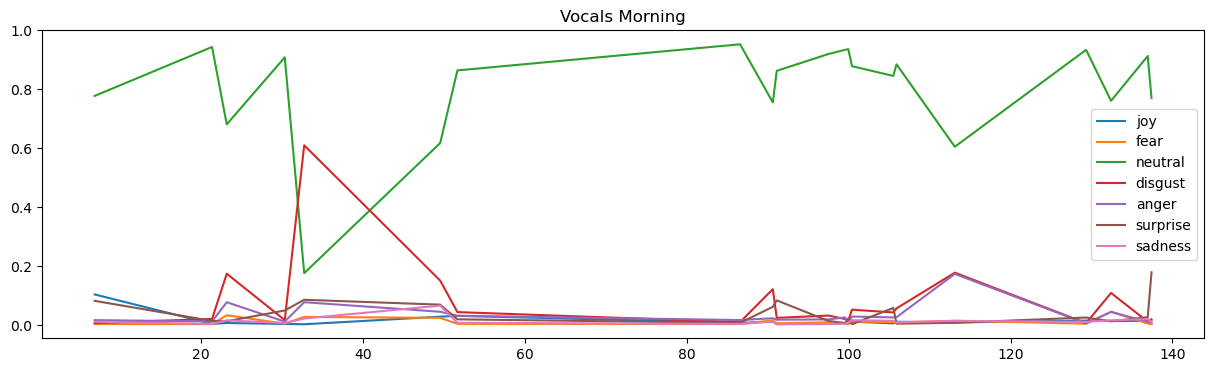

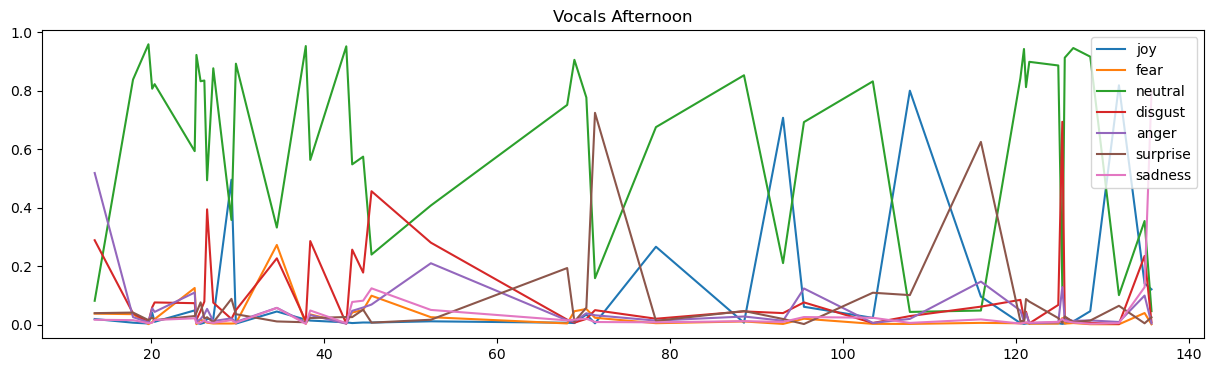

In [200]:
all_emotions_line_plot(df_rhythm_morning, "Vocals Morning")
all_emotions_line_plot(df_rhythm_afternoon, "Vocals Afternoon")

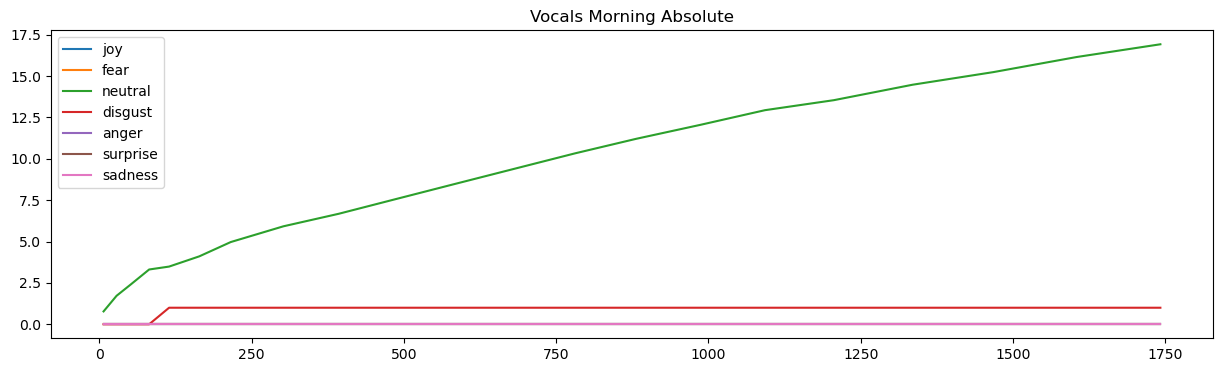

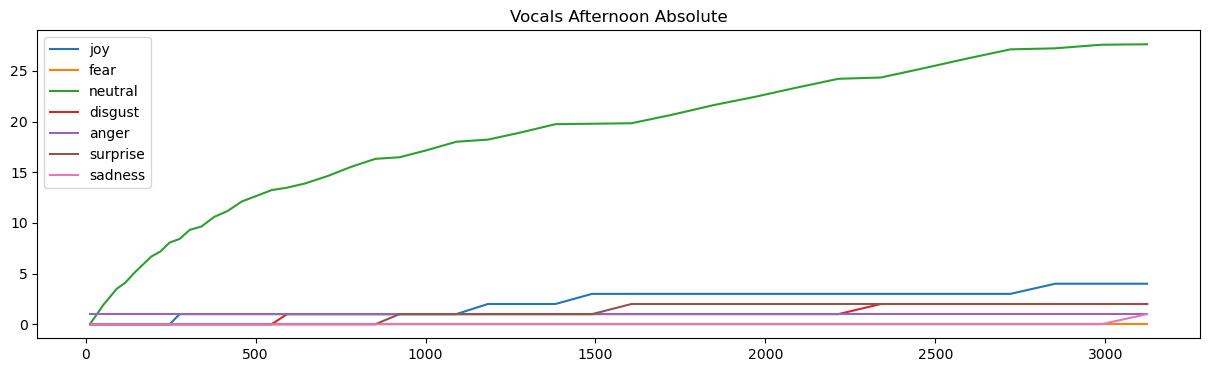

In [213]:
all_emotions_line_plot(df_rhythm_morning_abs.cumsum(), "Vocals Morning Absolute")
all_emotions_line_plot(df_rhythm_afternoon_abs.cumsum(), "Vocals Afternoon Absolute")

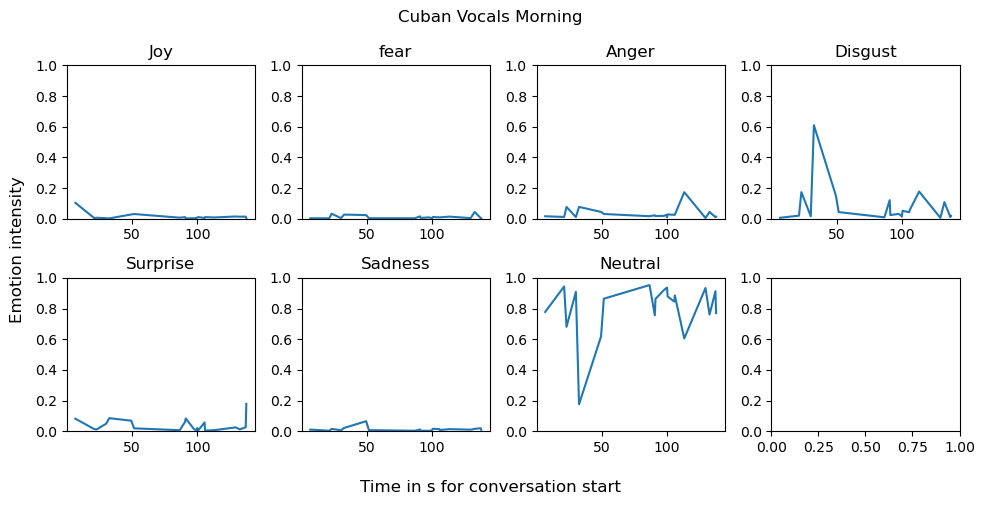

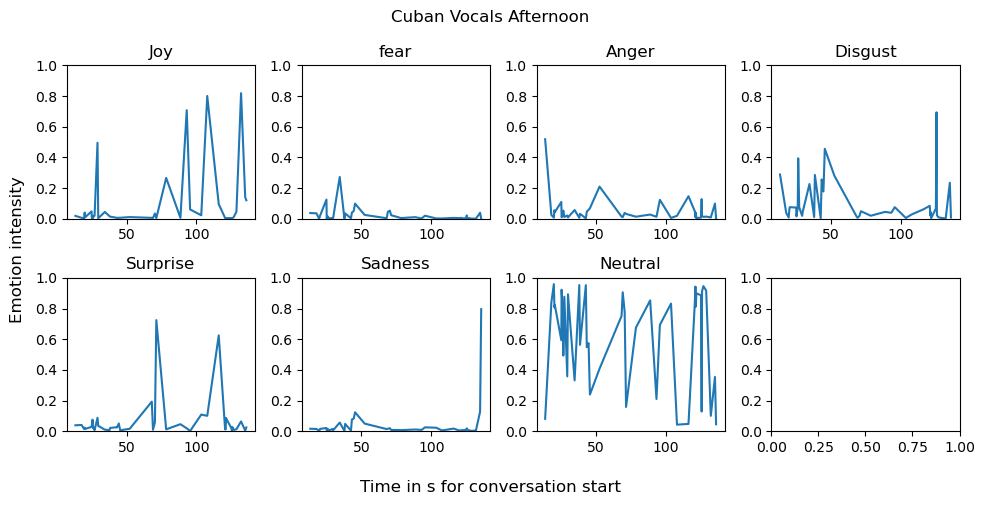

In [223]:
single_emotion_line_plot(df_rhythm_morning, "Cuban Vocals Morning")
single_emotion_line_plot(df_rhythm_afternoon, "Cuban Vocals Afternoon")


# Funk Band

In [209]:
df_funk_afternoon = pd.read_csv('../data/emotion_from_transcript/emotion-english-distilroberta-base/JFBB_Jazz_Funk_afternoon_video20230419143359 Luis Cal García.csv', index_col=0)
df_funk_morning = pd.read_csv('../data/emotion_from_transcript/emotion-english-distilroberta-base/JFBB_Jazz_Funk_morning_video20230419101818 Luis Cal García.csv', index_col=0)

df_funk_afternoon_abs = calculate_highest_emotion(df_funk_afternoon)
df_funk_morning_abs = calculate_highest_emotion(df_funk_morning)

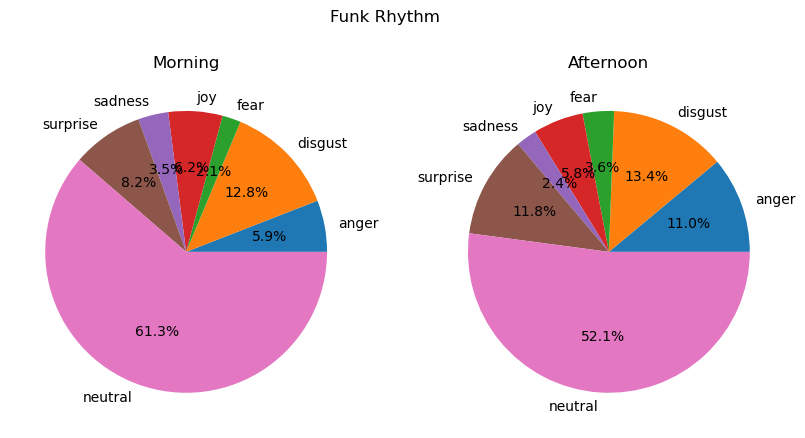

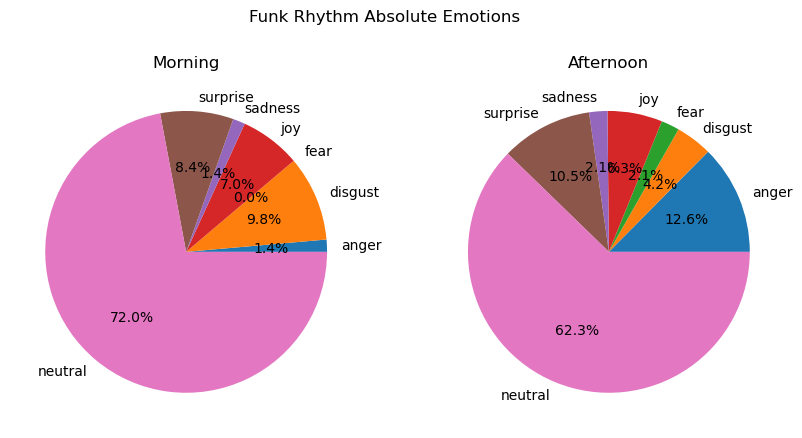

In [215]:
pie_plot_total_emotions(df_funk_morning, df_funk_afternoon, "Funk Rhythm")
pie_plot_total_emotions(df_funk_morning_abs, df_funk_afternoon_abs, "Funk Rhythm Absolute Emotions")

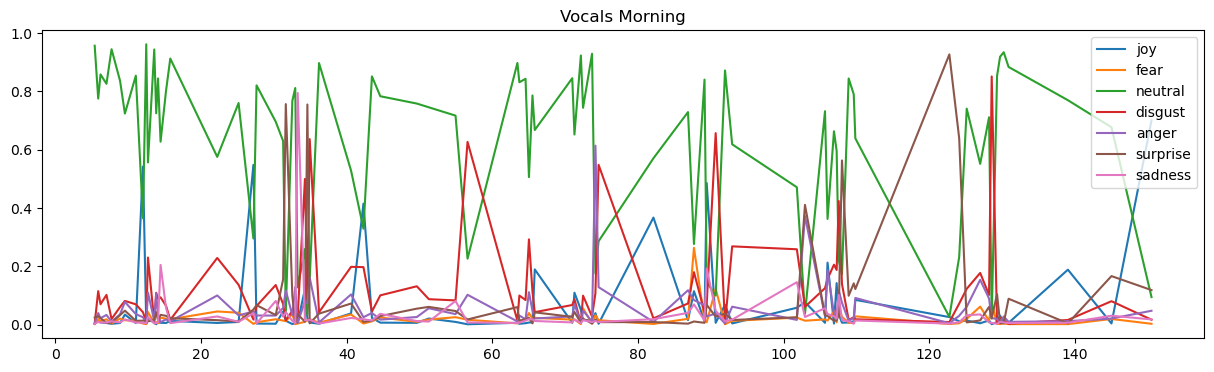

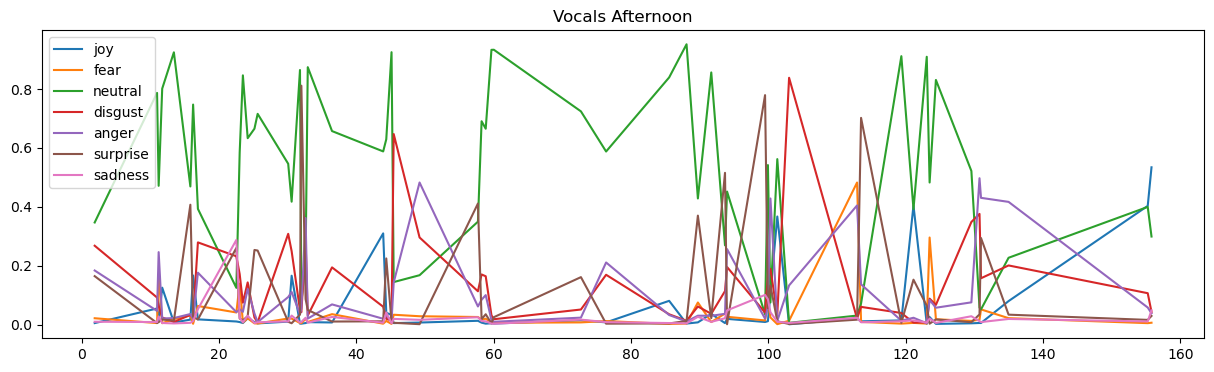

In [216]:
all_emotions_line_plot(df_funk_morning, "Vocals Morning")
all_emotions_line_plot(df_funk_afternoon, "Vocals Afternoon")

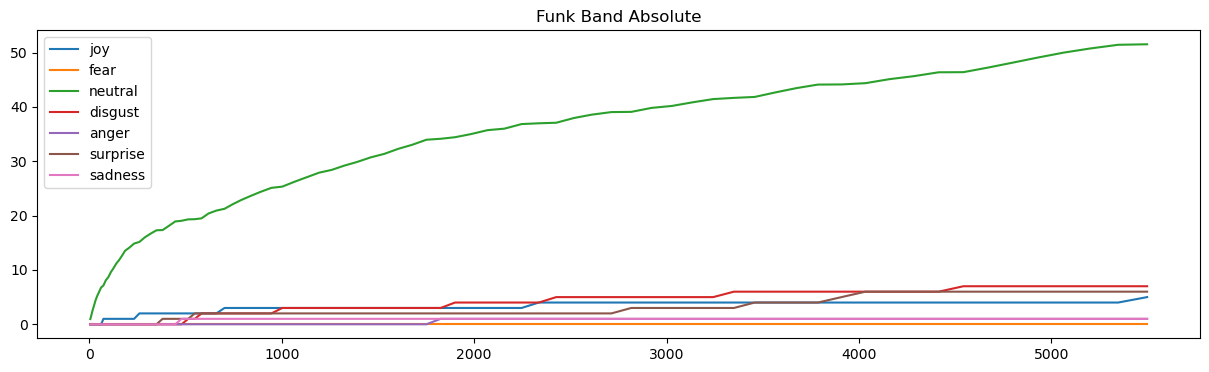

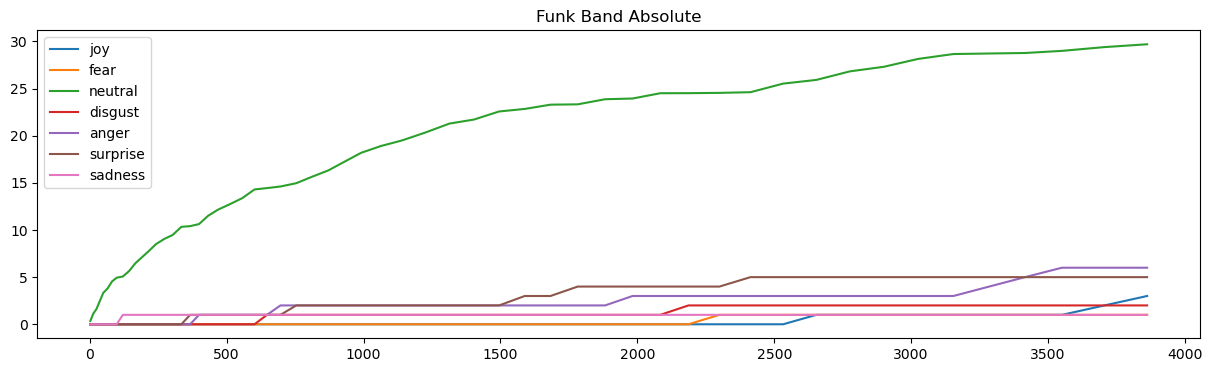

In [219]:
all_emotions_line_plot(df_funk_morning_abs.cumsum(), "Funk Band Absolute")
all_emotions_line_plot(df_funk_afternoon_abs.cumsum(), "Funk Band Absolute")

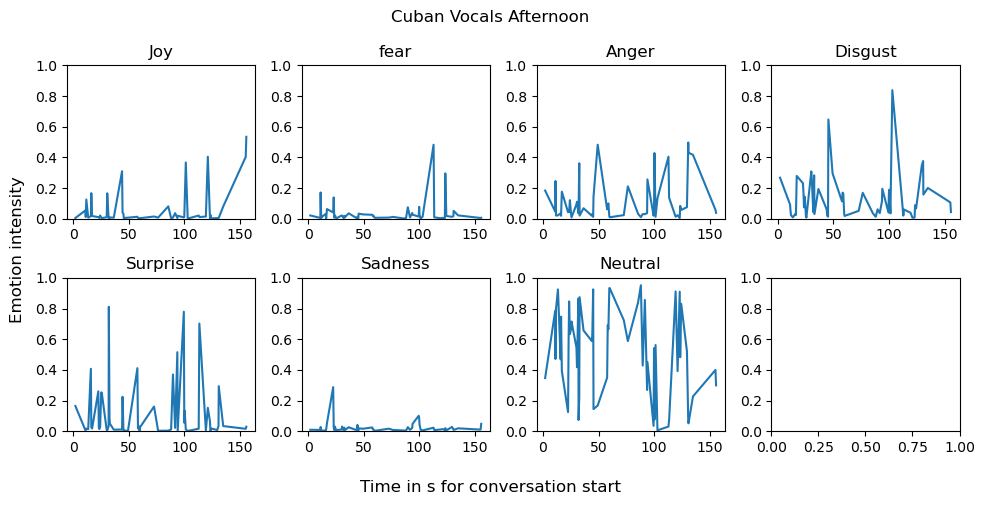

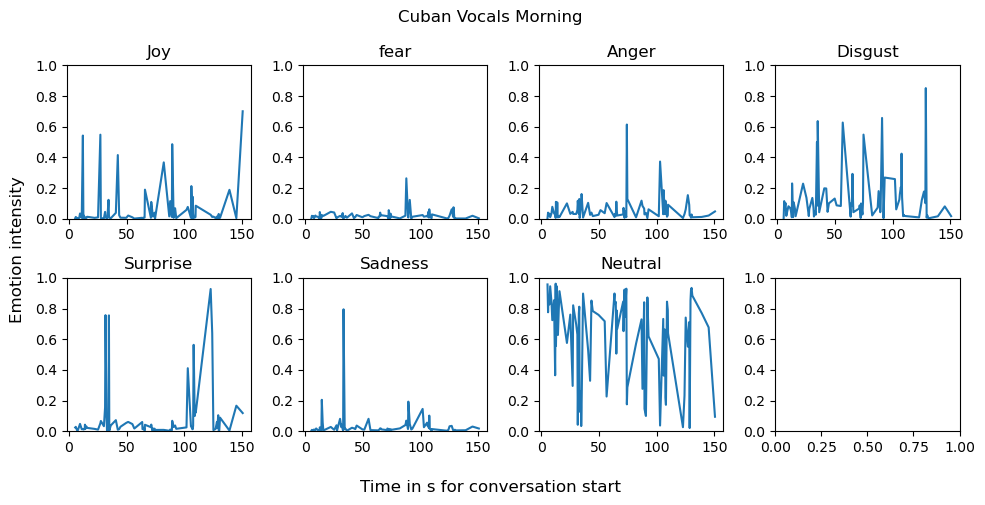

In [218]:
single_emotion_line_plot(df_funk_afternoon, "Funk Band Afternoon")
single_emotion_line_plot(df_funk_morning, "Funk Band Morning")